<a href="https://colab.research.google.com/github/Pritam-BA/DAY1/blob/main/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

def create_apollo_patient_data():
    """Create realistic Apollo Hospitals patient dataset"""
    n_patients = 1000  # Sample size

    # Generate realistic patient data
    data = {
        'patient_id': range(1, n_patients + 1),

        # Age distribution typical of Indian hospitals
        'age': np.random.gamma(2, 20, n_patients).astype(int),

        # Gender distribution
        'gender': np.random.choice(['Male', 'Female'], n_patients, p=[0.52, 0.48]),

        # Insurance type (common in India)
        'insurance_type': np.random.choice([
            'Self-Pay', 'Corporate', 'Government', 'CGHS', 'ESI', 'Mediclaim'
        ], n_patients, p=[0.3, 0.25, 0.15, 0.1, 0.1, 0.1]),

        # Department distribution
        'department': np.random.choice([
            'Cardiology', 'Orthopedics', 'General Medicine', 'Pediatrics',
            'Gynecology', 'Neurology', 'Oncology', 'Emergency'
        ], n_patients, p=[0.15, 0.18, 0.20, 0.12, 0.10, 0.08, 0.07, 0.10]),

        # City (Apollo locations)
        'city': np.random.choice([
            'Chennai', 'Hyderabad', 'Delhi', 'Bangalore', 'Kolkata', 'Mumbai'
        ], n_patients, p=[0.25, 0.20, 0.15, 0.15, 0.12, 0.13])
    }

    df = pd.DataFrame(data)

    # Create age groups
    df['age_group'] = pd.cut(df['age'],
                            bins=[0, 12, 18, 35, 50, 65, 100],
                            labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior', 'Elderly'])

    # Generate treatment costs based on realistic factors
    base_cost = 15000  # Base cost in INR

    # Age factor (elderly cost more)
    age_multiplier = 1 + (df['age'] / 100) * 0.5

    # Department factor
    dept_multipliers = {
        'Cardiology': 2.5, 'Oncology': 3.0, 'Neurology': 2.2,
        'Orthopedics': 1.8, 'General Medicine': 1.0, 'Pediatrics': 1.2,
        'Gynecology': 1.5, 'Emergency': 1.3
    }
    dept_factor = df['department'].map(dept_multipliers)

    # Insurance factor
    insurance_multipliers = {
        'Self-Pay': 0.8, 'Corporate': 1.2, 'Government': 0.7,
        'CGHS': 0.9, 'ESI': 0.85, 'Mediclaim': 1.1
    }
    insurance_factor = df['insurance_type'].map(insurance_multipliers)

    # Calculate treatment cost with some randomness
    df['treatment_cost'] = (base_cost * age_multiplier * dept_factor *
                           insurance_factor * np.random.uniform(0.7, 1.3, n_patients)).round(2)

    # Days hospitalized
    base_days = 3
    df['days_hospitalized'] = (base_days + (df['age'] / 20) +
                              np.random.poisson(2, n_patients)).astype(int)
    df['days_hospitalized'] = np.clip(df['days_hospitalized'], 1, 30)

    # Patient satisfaction score (1-10 scale)
    df['satisfaction_score'] = np.random.normal(7.5, 1.5, n_patients)
    df['satisfaction_score'] = np.clip(df['satisfaction_score'], 1, 10).round(1)

    return df

# Create the dataset
patient_data = create_apollo_patient_data()
print("Apollo Hospitals Patient Dataset Created!")
print(f"Dataset Shape: {patient_data.shape}")
print("\nFirst 5 rows:")
print(patient_data.head())


Apollo Hospitals Patient Dataset Created!
Dataset Shape: (1000, 10)

First 5 rows:
   patient_id  age  gender insurance_type        department       city  \
0           1   47    Male      Mediclaim  General Medicine    Chennai   
1           2   29    Male       Self-Pay         Neurology  Bangalore   
2           3   27  Female       Self-Pay        Pediatrics  Hyderabad   
3           4   27    Male            ESI        Cardiology    Chennai   
4           5   92    Male      Corporate        Pediatrics    Chennai   

     age_group  treatment_cost  days_hospitalized  satisfaction_score  
0        Adult        26082.27                  8                 6.2  
1  Young Adult        29361.33                  4                 7.6  
2  Young Adult        12841.01                  5                 9.2  
3  Young Adult        33778.10                  6                 8.9  
4      Elderly        40082.93                  9                 7.6  


In [ ]:
# Basic dataset information using info()
print("\n" + "="*60)
print("=== DATASET INFO ===")
print("="*60)
patient_data.info()

print("\n" + "="*60)
print("=== NUMERICAL VARIABLES SUMMARY ===")
print("="*60)
print(patient_data.describe())

print("\n" + "="*60)
print("=== ALL VARIABLES SUMMARY (including categorical) ===")
print("="*60)
print(patient_data.describe(include='all'))



=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   patient_id          1000 non-null   int64   
 1   age                 1000 non-null   int64   
 2   gender              1000 non-null   object  
 3   insurance_type      1000 non-null   object  
 4   department          1000 non-null   object  
 5   city                1000 non-null   object  
 6   age_group           958 non-null    category
 7   treatment_cost      1000 non-null   float64 
 8   days_hospitalized   1000 non-null   int64   
 9   satisfaction_score  1000 non-null   float64 
dtypes: category(1), float64(2), int64(3), object(4)
memory usage: 71.6+ KB

=== NUMERICAL VARIABLES SUMMARY ===
        patient_id          age  treatment_cost  days_hospitalized  \
count  1000.000000  1000.000000     1000.000000        1000.000000   
mean    500.500000 

In [ ]:
# Age group analysis (as specified in the task)
print("\n" + "="*60)
print("=== TREATMENT COST BY AGE GROUP ===")
print("="*60)

age_groups = patient_data.groupby('age_group')['treatment_cost'].agg(['mean', 'median', 'count', 'std'])
age_groups.columns = ['Mean_Cost', 'Median_Cost', 'Patient_Count', 'Std_Dev']
age_groups = age_groups.round(2)
print(age_groups)

# Exactly as specified in the task
age_groups_simple = patient_data.groupby('age_group')['treatment_cost'].mean()
print(f"\nSimple Age Group Analysis:")
print(age_groups_simple)



=== TREATMENT COST BY AGE GROUP ===
             Mean_Cost  Median_Cost  Patient_Count   Std_Dev
age_group                                                   
Child         24166.31     21349.88            115  11173.62
Teen          24947.41     23072.94            105  11823.62
Young Adult   25355.75     23195.50            305  10454.05
Adult         26794.04     23747.60            189  13501.18
Senior        31906.40     27907.87            114  14376.60
Elderly       35284.61     31687.58            130  16309.93

Simple Age Group Analysis:
age_group
Child          24166.313652
Teen           24947.414095
Young Adult    25355.754721
Adult          26794.038148
Senior         31906.398772
Elderly        35284.611769
Name: treatment_cost, dtype: float64


In [ ]:
# Detailed statistical analysis
print("\n" + "="*60)
print("=== DETAILED STATISTICS ===")
print("="*60)

# Age statistics
print("AGE STATISTICS:")
print(f"Mean Age: {patient_data['age'].mean():.2f} years")
print(f"Median Age: {patient_data['age'].median():.2f} years")
print(f"Age Standard Deviation: {patient_data['age'].std():.2f} years")
print(f"Age Range: {patient_data['age'].min()}-{patient_data['age'].max()} years")

# Treatment cost statistics
print(f"\nTREATMENT COST STATISTICS:")
print(f"Mean Treatment Cost: ₹{patient_data['treatment_cost'].mean():,.2f}")
print(f"Median Treatment Cost: ₹{patient_data['treatment_cost'].median():,.2f}")
print(f"Cost Standard Deviation: ₹{patient_data['treatment_cost'].std():,.2f}")
print(f"Cost Range: ₹{patient_data['treatment_cost'].min():,.2f} - ₹{patient_data['treatment_cost'].max():,.2f}")

# Missing values check
print(f"\nMISSING VALUES CHECK:")
missing_data = patient_data.isnull().sum()
if missing_data.sum() > 0:
    print(missing_data[missing_data > 0])
else:
    print("No missing values found!")

# Department-wise analysis
print(f"\nDEPARTMENT-WISE ANALYSIS:")
dept_analysis = patient_data.groupby('department')['treatment_cost'].agg(['mean', 'count'])
dept_analysis.columns = ['Mean_Cost', 'Patient_Count']
dept_analysis = dept_analysis.sort_values('Mean_Cost', ascending=False).round(2)
print(dept_analysis)

# Gender-based analysis
print(f"\nGENDER-BASED ANALYSIS:")
gender_stats = patient_data.groupby('gender').agg({
    'age': 'mean',
    'treatment_cost': 'mean',
    'days_hospitalized': 'mean',
    'satisfaction_score': 'mean'
}).round(2)
print(gender_stats)



=== DETAILED STATISTICS ===
AGE STATISTICS:
Mean Age: 40.70 years
Median Age: 34.00 years
Age Standard Deviation: 28.06 years
Age Range: 0-155 years

TREATMENT COST STATISTICS:
Mean Treatment Cost: ₹27,920.71
Median Treatment Cost: ₹24,858.72
Cost Standard Deviation: ₹13,436.62
Cost Range: ₹7,814.67 - ₹93,880.91

MISSING VALUES CHECK:
age_group    42
dtype: int64

DEPARTMENT-WISE ANALYSIS:
                  Mean_Cost  Patient_Count
department                                
Oncology           50377.26             66
Cardiology         41202.56            149
Neurology          34636.51             82
Orthopedics        29152.77            178
Gynecology         24517.42             86
Emergency          21754.40            102
Pediatrics         21003.39            122
General Medicine   16452.93            215

GENDER-BASED ANALYSIS:
          age  treatment_cost  days_hospitalized  satisfaction_score
gender                                                              
Female  41.65 

In [ ]:
# Distribution analysis
print("\n" + "="*60)
print("=== DISTRIBUTION ANALYSIS ===")
print("="*60)

# Age group distribution
print("AGE GROUP DISTRIBUTION:")
age_distribution = patient_data['age_group'].value_counts().sort_index()
age_percentages = (age_distribution / len(patient_data) * 100).round(2)
age_summary = pd.DataFrame({
    'Count': age_distribution,
    'Percentage': age_percentages
})
print(age_summary)

# Insurance type distribution
print(f"\nINSURANCE TYPE DISTRIBUTION:")
insurance_dist = patient_data['insurance_type'].value_counts()
insurance_pct = (insurance_dist / len(patient_data) * 100).round(2)
insurance_summary = pd.DataFrame({
    'Count': insurance_dist,
    'Percentage': insurance_pct
})
print(insurance_summary)

# City-wise analysis
print(f"\nCITY-WISE ANALYSIS:")
city_analysis = patient_data.groupby('city').agg({
    'treatment_cost': ['mean', 'median'],
    'days_hospitalized': 'mean',
    'satisfaction_score': 'mean'
}).round(2)
city_analysis.columns = ['Mean_Cost', 'Median_Cost', 'Avg_Days', 'Avg_Satisfaction']
city_analysis = city_analysis.sort_values('Mean_Cost', ascending=False)
print(city_analysis)



=== DISTRIBUTION ANALYSIS ===
AGE GROUP DISTRIBUTION:
             Count  Percentage
age_group                     
Child          115        11.5
Teen           105        10.5
Young Adult    305        30.5
Adult          189        18.9
Senior         114        11.4
Elderly        130        13.0

INSURANCE TYPE DISTRIBUTION:
                Count  Percentage
insurance_type                   
Self-Pay          306        30.6
Corporate         236        23.6
Government        180        18.0
ESI               108        10.8
Mediclaim          89         8.9
CGHS               81         8.1

CITY-WISE ANALYSIS:
           Mean_Cost  Median_Cost  Avg_Days  Avg_Satisfaction
city                                                         
Bangalore   28563.57     25073.06      6.79              7.41
Hyderabad   28392.15     25867.17      6.47              7.32
Kolkata     28369.92     24210.04      6.57              7.55
Chennai     27909.40     24874.54      6.40              7.63
Mu

In [ ]:
# Correlation analysis
print("\n" + "="*60)
print("=== CORRELATION ANALYSIS ===")
print("="*60)

numerical_cols = ['age', 'treatment_cost', 'days_hospitalized', 'satisfaction_score']
correlation_matrix = patient_data[numerical_cols].corr().round(3)
print(correlation_matrix)

# Outlier detection using IQR method
print(f"\nOUTLIER DETECTION (Treatment Cost):")
Q1 = patient_data['treatment_cost'].quantile(0.25)
Q3 = patient_data['treatment_cost'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = patient_data[(patient_data['treatment_cost'] < lower_bound) |
                       (patient_data['treatment_cost'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {len(outliers)/len(patient_data)*100:.2f}%")
print(f"IQR Method - Lower Bound: ₹{lower_bound:,.2f}, Upper Bound: ₹{upper_bound:,.2f}")



=== CORRELATION ANALYSIS ===
                      age  treatment_cost  days_hospitalized  \
age                 1.000           0.277              0.729   
treatment_cost      0.277           1.000              0.205   
days_hospitalized   0.729           0.205              1.000   
satisfaction_score  0.031           0.002              0.013   

                    satisfaction_score  
age                              0.031  
treatment_cost                   0.002  
days_hospitalized                0.013  
satisfaction_score               1.000  

OUTLIER DETECTION (Treatment Cost):
Number of outliers: 47
Percentage of outliers: 4.70%
IQR Method - Lower Bound: ₹-5,300.94, Upper Bound: ₹57,418.30


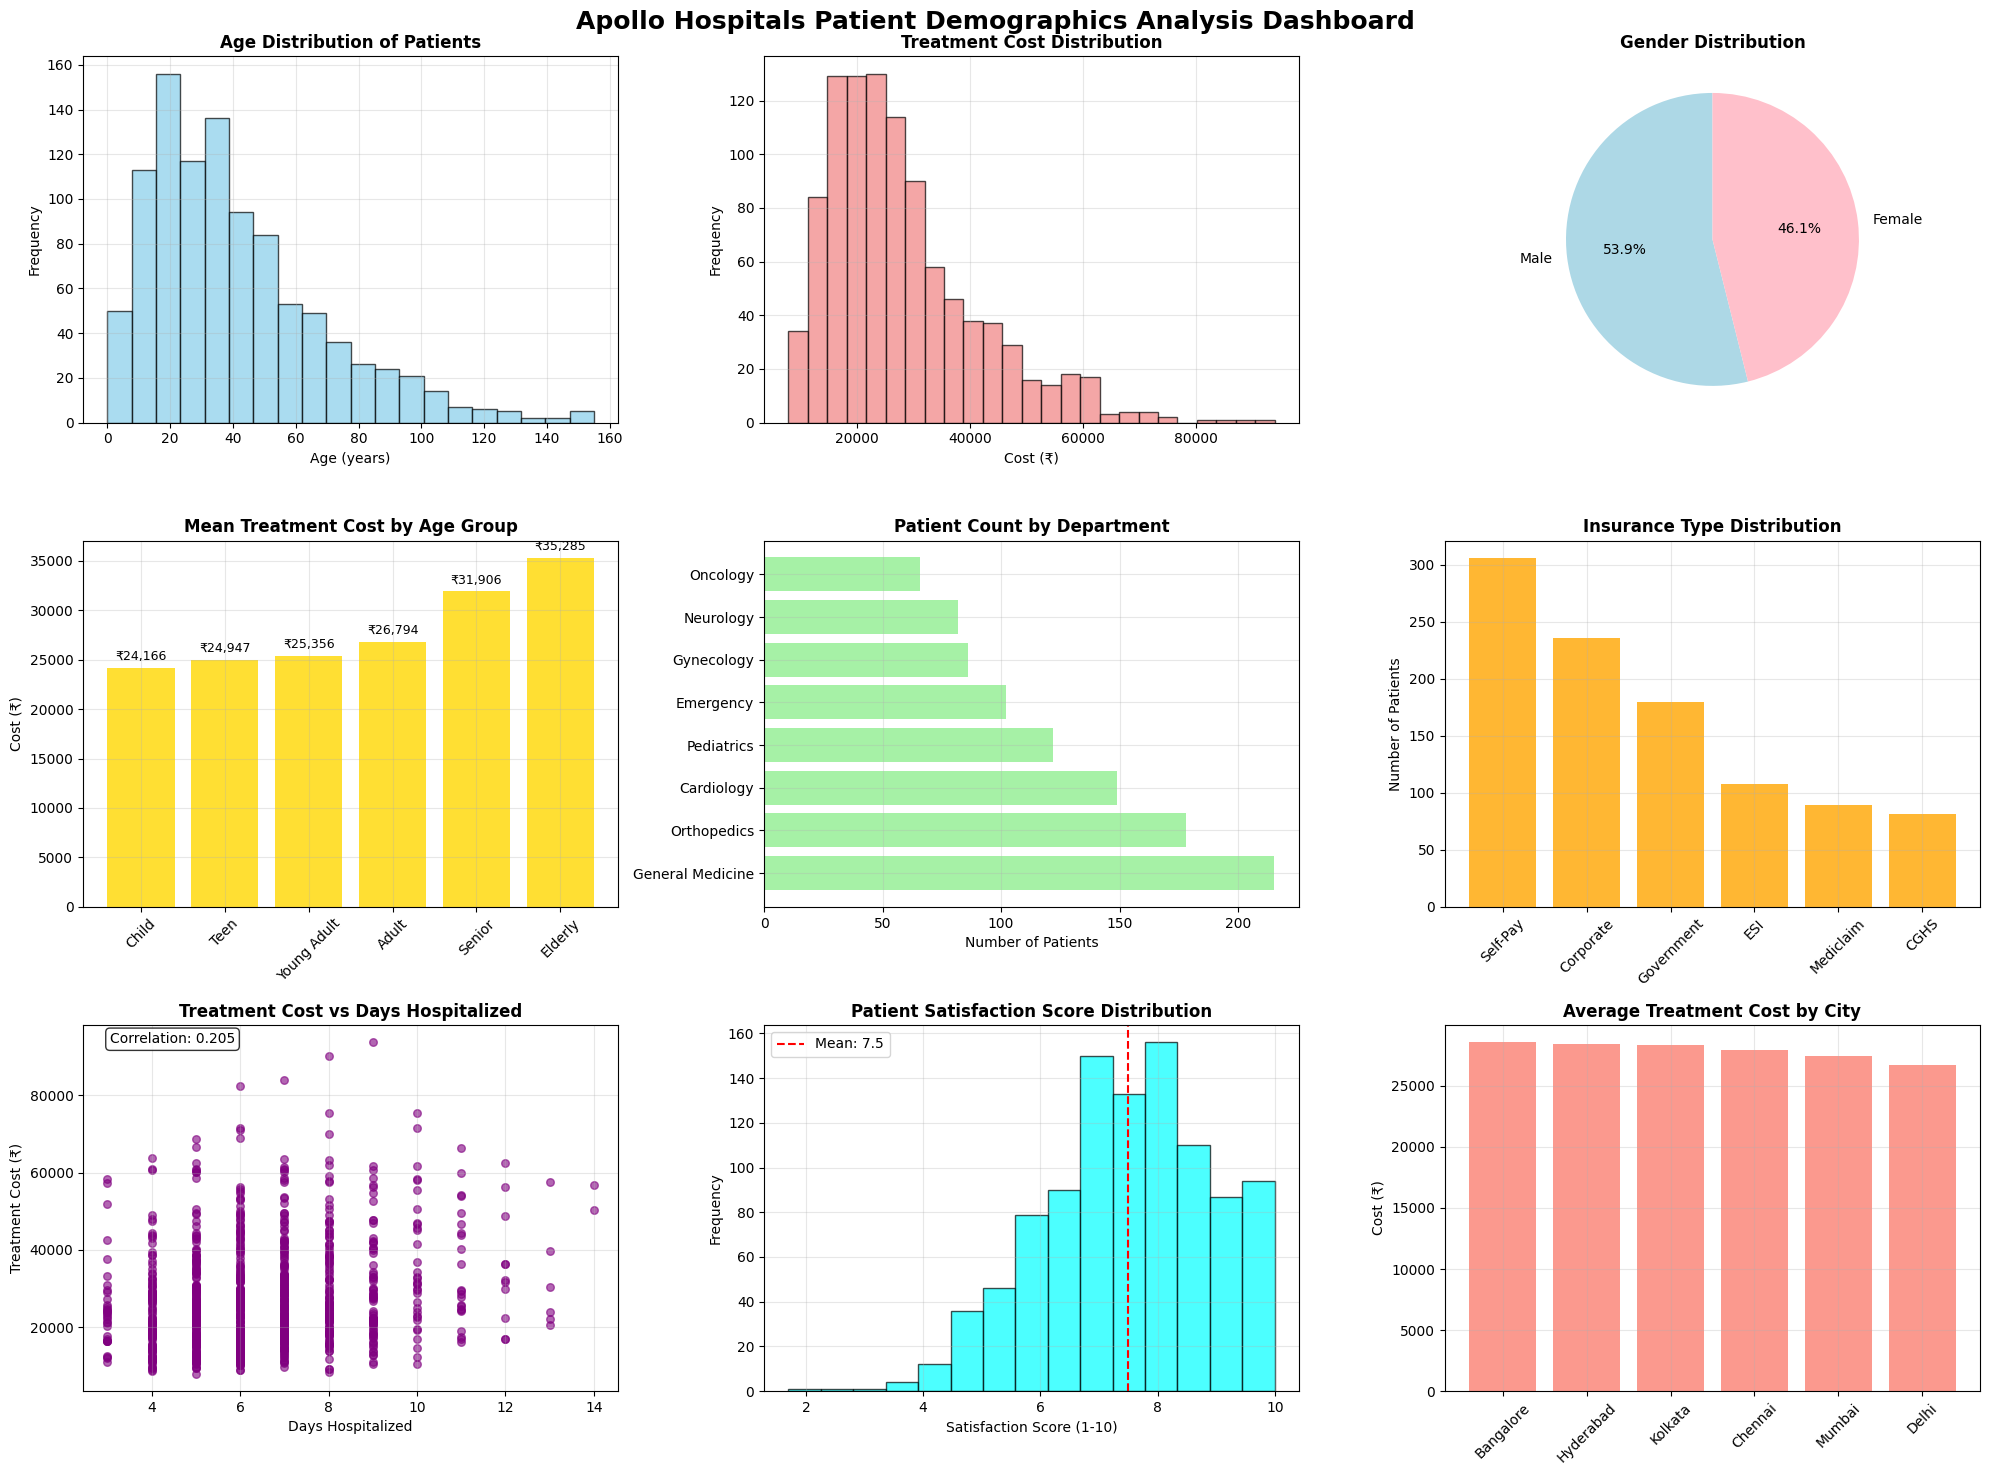

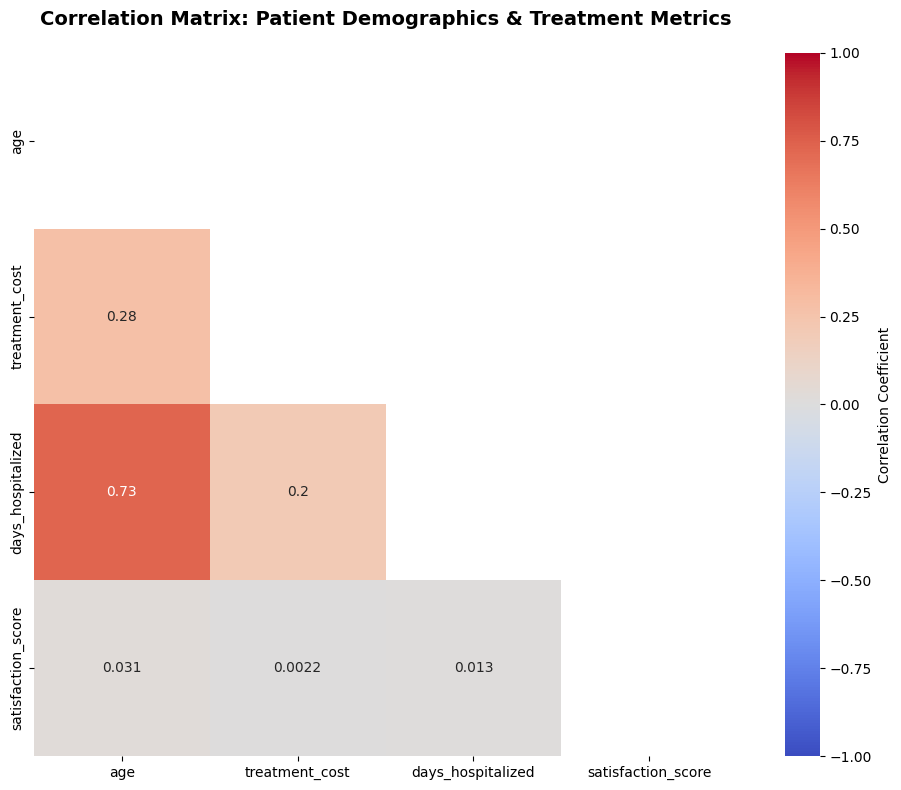

In [ ]:
# Create comprehensive healthcare analytics dashboard
plt.style.use('default')
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Apollo Hospitals Patient Demographics Analysis Dashboard',
             fontsize=18, fontweight='bold', y=0.98)

# 1. Age Distribution
axes[0,0].hist(patient_data['age'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Age Distribution of Patients', fontweight='bold')
axes[0,0].set_xlabel('Age (years)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)

# 2. Treatment Cost Distribution
axes[0,1].hist(patient_data['treatment_cost'], bins=25, color='lightcoral', alpha=0.7, edgecolor='black')
axes[0,1].set_title('Treatment Cost Distribution', fontweight='bold')
axes[0,1].set_xlabel('Cost (₹)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].grid(True, alpha=0.3)

# 3. Gender Distribution
gender_counts = patient_data['gender'].value_counts()
colors = ['lightblue', 'pink']
axes[0,2].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
              colors=colors, startangle=90)
axes[0,2].set_title('Gender Distribution', fontweight='bold')

# 4. Age Group vs Treatment Cost (Main Analysis)
age_cost = patient_data.groupby('age_group')['treatment_cost'].mean()
bars = axes[1,0].bar(range(len(age_cost)), age_cost.values, color='gold', alpha=0.8)
axes[1,0].set_xticks(range(len(age_cost)))
axes[1,0].set_xticklabels(age_cost.index, rotation=45)
axes[1,0].set_title('Mean Treatment Cost by Age Group', fontweight='bold')
axes[1,0].set_ylabel('Cost (₹)')
axes[1,0].grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, age_cost.values):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500,
                   f'₹{value:,.0f}', ha='center', va='bottom', fontsize=9)

# 5. Department-wise Patient Count
dept_counts = patient_data['department'].value_counts()
axes[1,1].barh(dept_counts.index, dept_counts.values, color='lightgreen', alpha=0.8)
axes[1,1].set_title('Patient Count by Department', fontweight='bold')
axes[1,1].set_xlabel('Number of Patients')
axes[1,1].grid(True, alpha=0.3)

# 6. Insurance Type Distribution
insurance_counts = patient_data['insurance_type'].value_counts()
bars2 = axes[1,2].bar(range(len(insurance_counts)), insurance_counts.values, color='orange', alpha=0.8)
axes[1,2].set_xticks(range(len(insurance_counts)))
axes[1,2].set_xticklabels(insurance_counts.index, rotation=45)
axes[1,2].set_title('Insurance Type Distribution', fontweight='bold')
axes[1,2].set_ylabel('Number of Patients')
axes[1,2].grid(True, alpha=0.3)

# 7. Cost vs Days Hospitalized Scatter
scatter = axes[2,0].scatter(patient_data['days_hospitalized'], patient_data['treatment_cost'],
                           alpha=0.6, color='purple', s=30)
axes[2,0].set_title('Treatment Cost vs Days Hospitalized', fontweight='bold')
axes[2,0].set_xlabel('Days Hospitalized')
axes[2,0].set_ylabel('Treatment Cost (₹)')
axes[2,0].grid(True, alpha=0.3)

# Add correlation coefficient
corr_coef = patient_data['days_hospitalized'].corr(patient_data['treatment_cost'])
axes[2,0].text(0.05, 0.95, f'Correlation: {corr_coef:.3f}',
               transform=axes[2,0].transAxes, fontsize=10,
               bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# 8. Satisfaction Score Distribution
axes[2,1].hist(patient_data['satisfaction_score'], bins=15, color='cyan', alpha=0.7, edgecolor='black')
axes[2,1].set_title('Patient Satisfaction Score Distribution', fontweight='bold')
axes[2,1].set_xlabel('Satisfaction Score (1-10)')
axes[2,1].set_ylabel('Frequency')
axes[2,1].grid(True, alpha=0.3)

# Add mean line
mean_satisfaction = patient_data['satisfaction_score'].mean()
axes[2,1].axvline(mean_satisfaction, color='red', linestyle='--',
                  label=f'Mean: {mean_satisfaction:.1f}')
axes[2,1].legend()

# 9. City-wise Average Cost
city_cost = patient_data.groupby('city')['treatment_cost'].mean().sort_values(ascending=False)
bars3 = axes[2,2].bar(range(len(city_cost)), city_cost.values, color='salmon', alpha=0.8)
axes[2,2].set_xticks(range(len(city_cost)))
axes[2,2].set_xticklabels(city_cost.index, rotation=45)
axes[2,2].set_title('Average Treatment Cost by City', fontweight='bold')
axes[2,2].set_ylabel('Cost (₹)')
axes[2,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = patient_data[['age', 'treatment_cost', 'days_hospitalized', 'satisfaction_score']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
           square=True, cbar_kws={'label': 'Correlation Coefficient'},
           mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix: Patient Demographics & Treatment Metrics',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()
